# ***Chapter 33: Supervized learning Linear regression***


In [34]:
import pandas as pd

In [35]:
data=pd.read_csv("student_scores.csv") 
print(data.head(10)) # will print starting 10 records

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


In [36]:
print('columns:',data.columns.tolist()) # print columns name

columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']


In [37]:
print('\nDataset Info:')
data.info() # It give info of entries,null values,data types,memery usage


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB


In [38]:
print('\nDataset completeness:') 
data.isnull().sum()


Dataset completeness:


name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

In [39]:
print('\ndataset consistancy')
data.dtypes


dataset consistancy


name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object

***Inspect Dataset***

In [40]:
print('\nDataset Describe:')
data.describe()


Dataset Describe:


,hours,score
count,92.000000,92.000000
mean,6.510870,68.836957
std,2.265336,15.692286
min,2.000000,35.000000
25%,5.000000,57.000000
50%,7.000000,70.000000
75%,8.000000,82.000000
max,11.000000,94.000000


In [41]:
print('\nDataset Bias')
data['gender'].value_counts(normalize=True)


Dataset Bias


gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64

In [42]:
data['grades'].value_counts(normalize=True)

grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64

In [43]:
data['class'].value_counts(normalize=True)

class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64

## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_scores.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Taniksha Pawar |
| **Last Updated**    | 2026-2-6 |

 ***Seprating categorical and numerical features***

In [44]:
categorical=data.select_dtypes(include='object').columns
print('Categorical Features:',list(categorical))

Categorical Features: ['name', 'gender', 'grades', 'class']


In [45]:
numerical=data.select_dtypes(exclude='object').columns
print('Numerical features:',list(numerical))

Numerical features: ['hours', 'score']


***After seperating categorical and numerical data encoding happens but there is no need of encoding on current dataset due to the features we need are already numerical***

In [48]:
# seperating feature and label
x=data[["hours"]] #feature always in 2 dimensions
y=data["score"]

***Data Visualization to understand data***

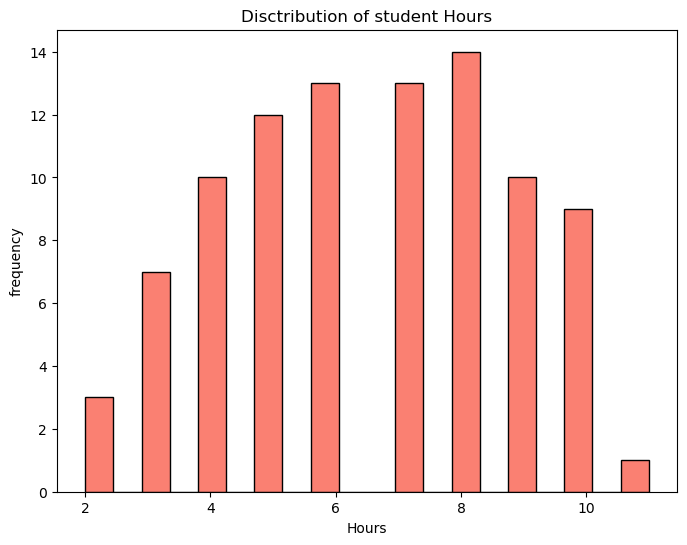

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(x,bins=20,color='salmon',edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('frequency')
plt.title('Disctribution of student Hours')
plt.show()

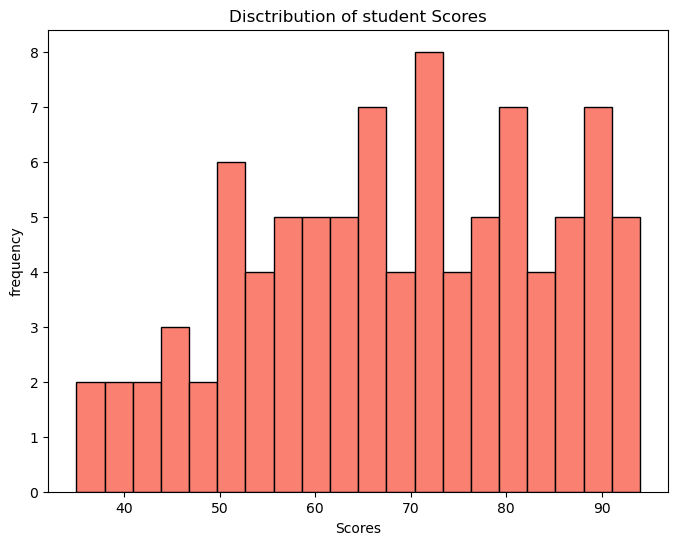

In [97]:
plt.figure(figsize=(8,6))
plt.hist(y,bins=20,color='salmon',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('frequency')
plt.title('Disctribution of student Scores')
plt.show()

***Train Test Split***

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train) # training data feed to model
print("model coefficient(slope):",model.coef_[0])
print("model intercept:",model.intercept_)

model coefficient(slope): 6.804392044598462
model intercept: 24.61763598011151


***Predicting scores using model***


In [62]:
y_pred=model.predict(x_test)
pred_data={'Y_prediction':y_pred.round(2),
           'Y_test':y_test.reset_index(drop=True)}
prediction_table=pd.DataFrame(pred_data)
prediction_table

,Y_prediction,Y_test
0,79.05,81
1,85.86,84
2,45.03,40
3,38.23,36
4,79.05,76
5,79.05,82
6,72.25,75
7,85.86,85
8,58.64,60
9,45.03,43


In [69]:
new_input=pd.DataFrame([[5]],columns=['hours'])
print(model.predict(new_input))

[58.6395962]


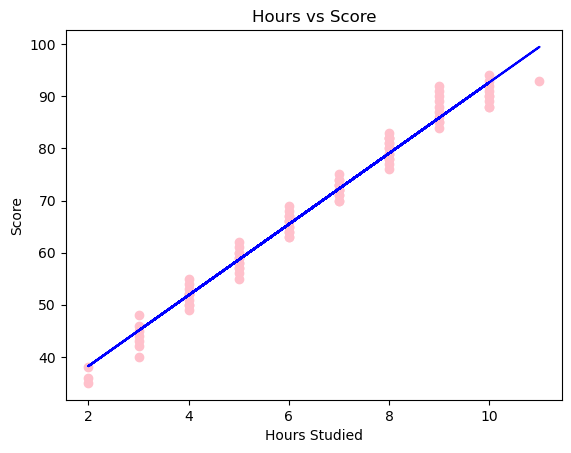

In [70]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='pink')
plt.plot(X, model.predict(X), color='blue')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

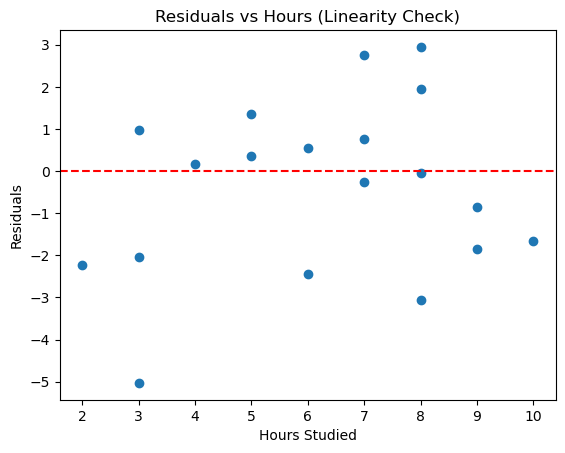

In [72]:
residuals = y_test - y_pred

# 1. Linearity check (Residuals vs X)
plt.scatter(x_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MSE  : 4.24
RMSE : 2.06
R²   : 0.984


***presiction more than one values***

In [84]:
new={
    
    "hours": [1, 2, 3, 4, 5, 6, 7, 8]
}
df=pd.DataFrame(new)
df





,hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [87]:
print(model.predict(df))

[31.42202802 38.22642007 45.03081211 51.83520416 58.6395962  65.44398825
 72.24838029 79.05277234]
